test results on our test data: 
      yield
0  0.684706
1  0.766471
2  0.004706
3 -0.422941
[0.06408598 0.14457314 0.14781693 0.04057891]
adjusted predictions: 
[2.4756803457399252, 1.981405245164116, 1.673781387240921, 1.290308072493021]
          0
0  2.475680
1  1.981405
2  1.673781
3  1.290308
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     40.78
Date:                Sun, 09 Jul 2023   Prob (F-statistic):             0.0237
Time:                        22:58:13   Log-Likelihood:                 2.8075
No. Observations:                   4   AIC:                            -1.615
Df Residuals:                       2   BIC:                            -2.842
Df Model:                           1                                

/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_classes.py:469: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_classes.py:469: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_classes.py:469: UserWarning: y_pred and y_

(0.32794082140949576, 0.9763458513229033)

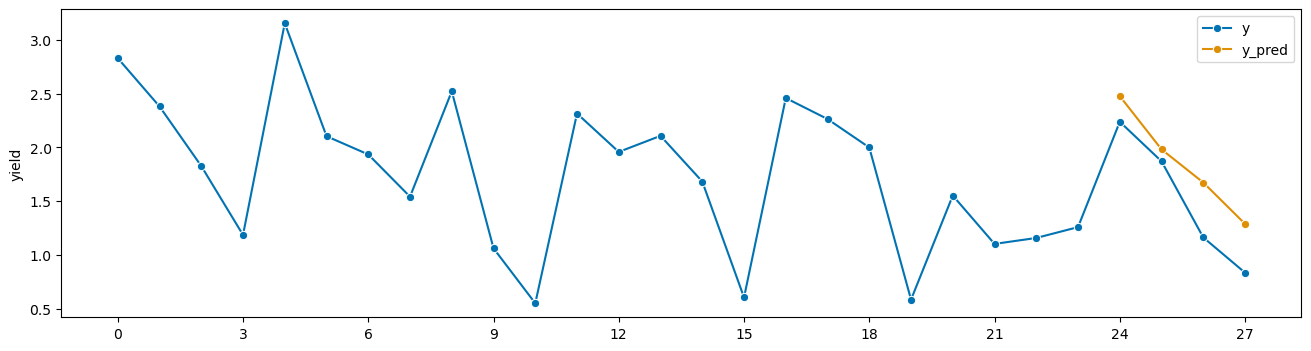

In [1]:
import joblib
import pandas as pd
# import the API
APILoc = 'API/'

import sys
sys.path.insert(0, APILoc)

from API import *

# get aggregate data
targetDataLoc = '~/ctgan/data/ts_Fictionville_OH_18_vlo_rad_stat.csv'
targetDf = pd.read_csv(targetDataLoc)
boostDataLoc = '~/ctgan/data/ts_Fictionville_OH_10_to_15_stat.csv'
boostDf = pd.read_csv(boostDataLoc)
targetDf.head()

xColumnsToKeep = ["radiation","rain", "avg_max_temp", "avg_min_temp"]
yColumnsToKeep = ["yield"]
test_xDf = targetDf[xColumnsToKeep]
boost_xDf = boostDf[xColumnsToKeep]
test_yDf = targetDf[yColumnsToKeep]
boost_yDf = boostDf[yColumnsToKeep]

# reset the index
xTest = test_xDf.reset_index(drop=True)
yTest = test_yDf.reset_index(drop=True)
boost_xDf = boost_xDf.reset_index(drop=True)
boost_yDf = boost_yDf.reset_index(drop=True)

all_years_Loc = '~/ctgan/data/ts_NB_OH_10_to_18_no15_no17_class_mv_idx_ylds.csv'
all_yearsDf = pd.read_csv(all_years_Loc)
final_year_Loc = '~/ctgan/data/NB_OH_avg_ylds_for_math_mv_10_to_16.csv'
final_yearDf = pd.read_csv(final_year_Loc)
final_yearDf.head()
target_year_Loc = '~/ctgan/data/ts_NB_OH_2018_ylds_mv_idx.csv'
target_yearDf = pd.read_csv(target_year_Loc)

model = joblib.load('working_dir/xgbTup_070923_3.pkl')
actualTest(all_yearsDf, final_yearDf, target_yearDf, boost_xDf, boost_yDf, xTest, yTest, model[0])